<a href="https://colab.research.google.com/github/Reji20/Datascience--lab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow import keras
mnistDB=keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test)=mnistDB.load_data()

11501568/11490434 [==============================] - 0s 0us/step


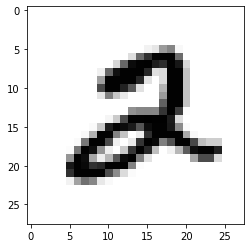

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5],cmap='binary')

In [26]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

In [27]:
x_train=x_train.astype('float32')/225
x_test=x_test.astype('float32')/225

In [28]:
cnnModel_MNIST=keras.models.Sequential()
cnnModel_MNIST.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]))
cnnModel_MNIST.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
cnnModel_MNIST.add(keras.layers.MaxPooling2D((2,2)))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Flatten())
cnnModel_MNIST.add(keras.layers.Dense(128,activation='relu'))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Dense(10,activation='softmax'))
cnnModel_MNIST.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                     

In [29]:
cnnModel_MNIST.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
cnnModel_MNIST.fit(x_train,y_train,epochs=1,batch_size=10)
test_loss,test_accuracy=cnnModel_MNIST.evaluate(x_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 2.3010 - accuracy: 0.1135


In [31]:
print(test_loss,test_accuracy)

2.3010387420654297 0.11349999904632568
